In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data into a pandas dataframe
df = pd.read_csv('learningSet.csv')

#Check the shape of the dataframe
print("Dataframe Shape:", df.shape)

#Show the first five rows of the dataframe
print("\nFirst 5 rows of the Dataframe:")
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_17720\3021907324.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('learningSet.csv')


Dataframe Shape: (95412, 481)

First 5 rows of the Dataframe:


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [2]:
#Check the number of unique values in the target column 'TARGET_B'
print("\nUnique values count in 'TARGET_B':")
print(df['TARGET_B'].value_counts())


Unique values count in 'TARGET_B':
0    90569
1     4843
Name: TARGET_B, dtype: int64


In [3]:
#Get a summary of the target column 'TARGET_D'
print("\nSummary of 'TARGET_D':")
print(df['TARGET_D'].describe())


Summary of 'TARGET_D':
count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64


In [4]:
#Get a summary of the target column 'TARGET_D' for the rows where 'TARGET_B' is greater than 0
print("\nSummary of 'TARGET_D' where 'TARGET_B' is greater than 0:")
print(df[df['TARGET_B'] > 0]['TARGET_D'].describe())


Summary of 'TARGET_D' where 'TARGET_B' is greater than 0:
count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64


To solve this problem we will first build a classification model to predict who will more likely respond and then for those respondents, we will build a regression model to predict the donation amount.

Then we can use the cost matrix to calculate the total benefit from the donations

# 7.01 

In [5]:
# calculate the percentage of missing values in each column
missing_values_pct = (df.isnull().sum() / len(df)) * 100

# sort the values and store the result in a new dataframe
sorted_missing_values_pct = missing_values_pct.sort_values(ascending=False)

# print the result
print(sorted_missing_values_pct)

RDATE_5    99.990567
RAMNT_5    99.990567
RDATE_3    99.746363
RAMNT_3    99.746363
RDATE_4    99.705488
             ...    
ETHC3       0.000000
ETHC2       0.000000
ETHC1       0.000000
HHD12       0.000000
TPE11       0.000000
Length: 481, dtype: float64


In [6]:
# Filter the columns with missing values
missing_vals_cols = missing_values_pct[missing_values_pct > 0].sort_values(ascending=False)
missing_vals_cols

RDATE_5     99.990567
RAMNT_5     99.990567
RAMNT_3     99.746363
RDATE_3     99.746363
RDATE_4     99.705488
              ...    
MSA          0.138347
ADI          0.138347
DMA          0.138347
CLUSTER2     0.138347
GEOCODE2     0.138347
Length: 92, dtype: float64

In [7]:
# Create a list of columns to drop
drop_cols = missing_values_pct[missing_values_pct > 0.25].index.tolist()

# Remove the columns from the drop_cols list if they are 'WEALTH1' or 'WEALTH2'
drop_cols = [col for col in drop_cols if col not in ['WEALTH1', 'WEALTH2']]

# Drop the columns from the dataframe
df = df.drop(columns=drop_cols)

In [8]:
# list of the columns with missing values over 25% of the dataset
missing_values_pct[missing_values_pct > 0.25].index.tolist()

['AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',


 ## 7.01 Activity 2

In [9]:
# see the new number of columns after the cleaning regarding missing values we've made
df.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=396)

We can see that there are a lot of columns that have blank spaces which represent no value in this case.

In [14]:
# number of unique values in this column
df['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [15]:
# replace the empty values with the value A
df['MAILCODE'] = df['MAILCODE'].replace(' ', "A")

In [18]:
# reshow the number of unique values in this column to check if something going wrong
df['MAILCODE'].value_counts()

A    94013
B     1399
Name: MAILCODE, dtype: int64

# 3

Separating Target, Numerical Features, and Categorical Features

In [26]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [27]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,...,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,...,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,...,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,...,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,...,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,...,8005.0,14.0,6.864865,7112,1,2,26.0


In [28]:
numerical.shape


(95412, 335)

In [29]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,...,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,...,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,...,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,...,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,...,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,...,A2D,L,F,X,X,X,A


# Categorical 

In [30]:
pd.set_option('display.max_rows', None)
categorical.isna().sum()/len(categorical)*100

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
MAILCODE     0.000000
NOEXCH       0.007337
MDMAUD       0.000000
DOMAIN       2.427368
CLUSTER      2.427368
HOMEOWNR    23.296860
GENDER       3.099191
DATASRCE    22.303274
SOLIH       93.501866
VETERANS    89.072653
RFA_2        0.000000
RFA_3        2.043768
RFA_4        2.423175
RFA_6        3.728043
RFA_7        9.300717
RFA_8        3.679831
RFA_9       11.785729
RFA_11      10.923154
RFA_12       9.352073
RFA_14      19.774242
RFA_16      21.398776
RFA_18      22.285457
RFA_2R       0.000000
RFA_2A       0.000000
MDMAUD_R     0.000000
MDMAUD_F     0.000000
MDMAUD_A     0.000000
GEOCODE2     0.334339
dtype: float64

Working with categorical columns


In [32]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = df[df['count']<2500]['state'].to_list()

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = categorical['STATE'].apply(clean_state)

In [33]:
categorical['STATE'].value_counts()


other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

# 7.01 Lab | Revisiting Machine Learning Case Study

In [34]:
categorical.isna().sum()/len(categorical)*100



OSOURCE     0.972624
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
NOEXCH      0.007337
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.334339
Length: 31, dtype: float64

In [35]:
categorical = categorical.drop(columns= ['OSOURCE','ZIP'])


In [36]:
print(categorical['GENDER'].value_counts())


F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [37]:
categorical['GENDER'] = categorical['GENDER'].where((categorical['GENDER'] == 'M') | (categorical['GENDER'] == 'F'), 'OTHER')


In [38]:
categorical['GENDER'].value_counts()


F        51277
M        39094
OTHER     5041
Name: GENDER, dtype: int64

In [39]:
print(categorical['GENDER'].value_counts())


F        51277
M        39094
OTHER     5041
Name: GENDER, dtype: int64


In [40]:
categorical['GENDER'] = categorical['GENDER'].where((categorical['GENDER'] == 'M') | (categorical['GENDER'] == 'F'), 'OTHER')


In [41]:
categorical['GENDER'].value_counts()

F        51277
M        39094
OTHER     5041
Name: GENDER, dtype: int64

# 7.02

In [42]:
categorical['DOMAIN'].value_counts(dropna=False)


R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
       ...  
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, Length: 17, dtype: int64

In [43]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')


In [44]:
categorical['DOMAIN_A'] = categorical['DOMAIN'].str[:1]
categorical['DOMAIN_B'] = categorical['DOMAIN'].str[1:2]

In [45]:
categorical = categorical.drop(columns=['DOMAIN'])


In [46]:
categorical.head()


,STATE,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,...,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,0,XXXX,36,NaN,F,...,E,X,X,X,C,T,2
1,CA,A,0,XXXX,14,H,M,...,G,X,X,X,A,S,1
2,NC,A,0,XXXX,43,U,M,...,E,X,X,X,C,R,2
3,CA,A,0,XXXX,44,U,F,...,E,X,X,X,C,R,2
4,FL,A,0,XXXX,16,H,F,...,F,X,X,X,A,S,2


#### 2.1

In [47]:
list_t = ['MAILCODE', 'NOEXCH', 'MDMAUD']
for i in list_t:
    print(i)
    print(categorical[i].value_counts(dropna=False))

MAILCODE
A    94013
B     1399
Name: MAILCODE, dtype: int64
NOEXCH
0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: NOEXCH, dtype: int64
MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
        ...  
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, Length: 28, dtype: int64


In [48]:
drop_list = []
drop_list += list_t

In [49]:
drop_list

['MAILCODE', 'NOEXCH', 'MDMAUD']

In [50]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [51]:
categorical['CLUSTER'].value_counts(dropna=False)


40    3979
35    3624
36    3617
27    3553
24    3539
      ... 
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, Length: 54, dtype: int64

In [52]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')


In [53]:
categorical['HOMEOWNR'].value_counts(dropna=False)


H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [54]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')


In [55]:
categorical['GENDER'].value_counts(dropna=False)


F        51277
M        39094
OTHER     5041
Name: GENDER, dtype: int64

In [56]:
categorical['GENDER'].value_counts(dropna=False)


F        51277
M        39094
OTHER     5041
Name: GENDER, dtype: int64

In [57]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

# 2.2.1

In [58]:
list_t = ['DATASRCE', 'GEOCODE2']
for i in list_t:
    print(i)
    print(categorical[i].value_counts(dropna=False))

DATASRCE
3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64
GEOCODE2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64


In [59]:
# Following Jan solution but later will try 4 as other class
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('3')
# Most frequent data gets the nan
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [60]:
categorical['RFA_2'].value_counts()


L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

In [61]:
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [62]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [63]:
categorical = categorical.drop(columns=drop_list)
categorical.head()


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,3,NaN,NaN,L,E,C,T,2
1,CA,14,H,M,3,NaN,NaN,L,G,A,S,1
2,NC,43,U,M,3,NaN,NaN,L,E,C,R,2
3,CA,44,U,F,3,NaN,NaN,L,E,C,R,2
4,FL,16,H,F,3,12,NaN,L,F,A,S,2


In [64]:
categorical.isna().sum()


STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

# Working with numerical columns


Working with numerical columns


In [65]:
numerical.head()


,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,...,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,...,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,...,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,...,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,...,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,...,8005.0,14.0,6.864865,7112,1,2,26.0


In [66]:
numerical.shape


(95412, 335)

In [67]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
...,...,...
311,ADATE_16,20364
312,ADATE_18,21263
328,NEXTDATE,9973
329,TIMELAG,9973


In [68]:
drop_list = []
for i in numerical.columns:
    if 'ADATE' in i:
        drop_list.append(i)

In [69]:
drop_list.pop()
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18']

Filling NULL values with plots


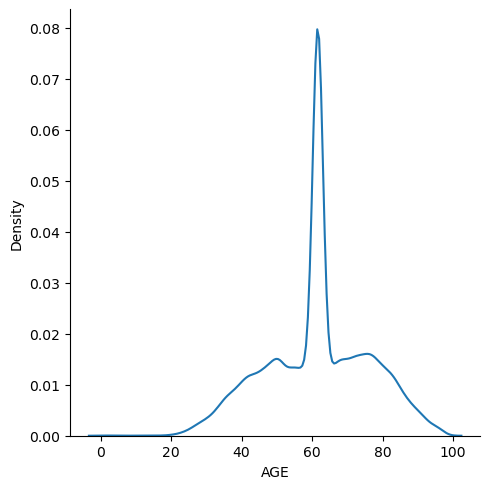

In [70]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
sns.displot(numerical['AGE'], kind = 'kde')
plt.show()

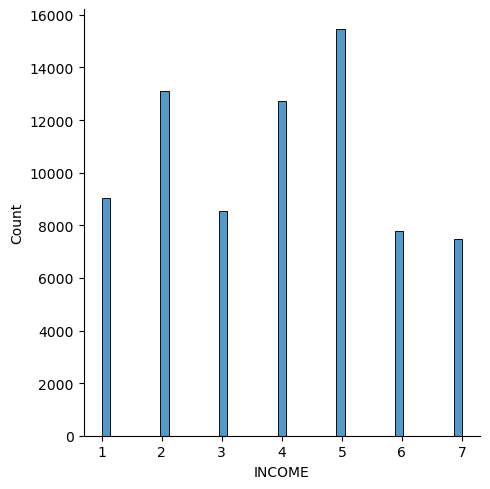

In [71]:
sns.displot(numerical['INCOME'])
plt.show()

In [72]:
print(numerical['INCOME'].value_counts())
numerical['INCOME'] = numerical['INCOME'].astype('object')


5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [73]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

In [74]:
numerical['INCOME'].value_counts()


5.0    36737
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

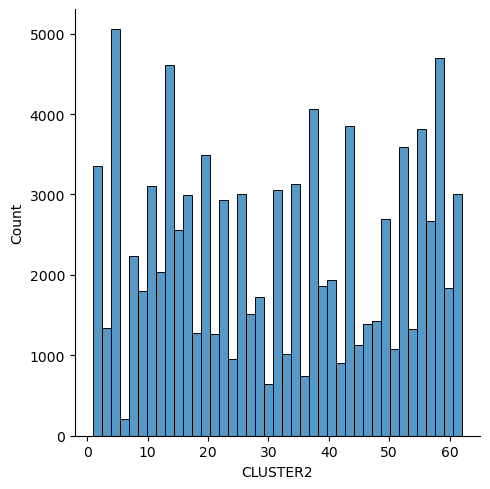

In [75]:
sns.displot(numerical['CLUSTER2']) 
plt.show()


In [76]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))


# 2.3

In [77]:
numerical_nuls = numerical.isna().sum().reset_index()
numerical_nuls.columns = ['column', 'count']


In [78]:
numerical_nuls[numerical_nuls['count'] > 0]


,column,count
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
...,...,...
310,ADATE_14,18867
311,ADATE_16,20364
312,ADATE_18,21263
328,NEXTDATE,9973


In [79]:
numerical['WEALTH2'].value_counts(dropna = False)
plt.show()

In [80]:
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(np.ceil(numerical['WEALTH2'].mean()))
numerical['WEALTH2'].value_counts()

5.0    49174
9.0     6523
8.0     5975
7.0     5684
6.0     5497
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [81]:
numerical['TIMELAG'].value_counts(dropna = False)


NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: TIMELAG, Length: 69, dtype: int64

In [82]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(numerical['TIMELAG'].median())


Lab 2

In [83]:
# Showing all columns that still have nans
numerical_nuls = numerical.isna().sum().reset_index()
numerical_nuls.columns = ['column', 'count']
numerical_nuls = numerical_nuls[numerical_nuls['count'] > 0]


numerical_nuls = numerical_nuls.loc[~numerical_nuls['column'].isin(drop_list)]
numerical_nuls

,column,count
5,WEALTH1,44732
135,MSA,132
136,ADI,132
137,DMA,132
328,NEXTDATE,9973


In [84]:
for i in numerical_nuls['column']:
    if i != 'NEXTDATE':
        print(i)
        display(numerical[i].value_counts(dropna=False))
        display(numerical[i].isna().sum())

WEALTH1


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

44732

MSA


0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

132

ADI


13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

132

DMA


803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

132

In [85]:
numerical[numerical_nuls['column']].describe().T

,count,mean,std,min,25%,50%,75%,max
WEALTH1,50680.0,5.345699,2.742490,0.0,3.0,6.0,8.0,9.0
MSA,95280.0,3527.744102,2863.904737,0.0,520.0,3350.0,5960.0,9360.0
ADI,95280.0,187.356402,137.019184,0.0,65.0,175.0,279.0,651.0
DMA,95280.0,664.004072,116.363600,0.0,561.0,635.0,801.0,881.0
NEXTDATE,85439.0,9151.022917,294.257260,7211.0,8903.0,9204.0,9409.0,9702.0


In [86]:
numerical['MSA'] = numerical['MSA'].fillna(0.0)
numerical['ADI'] = numerical['ADI'].fillna(13.0)
numerical['DMA'] = numerical['DMA'].fillna(803.0)

In [87]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(np.ceil(numerical['WEALTH1'].mean()))


# Wrapping up


In [88]:
numerical = numerical.drop(columns=drop_list)


In [89]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
316,NEXTDATE,9973


In [90]:
numerical.to_csv('numerical1.csv')
categorical.to_csv('categorical1.csv')

In [91]:
Y.to_csv('target1.csv')